# **Hackathon 2021**

Réalisé par :

- **ABCHIR Ouijdane**
- **ABOUTAYEB Yassin**
- **MAMDOUH YACINE**


La saisonnalité de la reproduction des moutons s'avère incompatible avec l'utilisation humaine, c'est pourquoi des nombreux agriculteurs utilisent des techniques d'**insémination artificielle** afin de stabiliser les rendements des moutons. 

La stratégie de reproduction des moutons est semblable à celle des autres espèces de bétail. Un troupeau de brebis est généralement fécondé par plusieurs béliers dominants, choisis par l'agriculteur.

Le succès de l'insémination est connu pour être largement influencé par les hormones de reproduction des brebis qui peuvent être contrôlées par **la durée de la copulation** des brebis. 

Le défi du **Hackathon** vise à comprendre comment la durée de la copulation des moutons ainsi que d'autres paramètres affectent le succès de l'insémination artificielle. 

Nous sommes face à un problème de **Machine Learning supervisé de classification**, et censés constituer le jeu de données (**features**) d'une manière judicieuse afin d'optimiser le modèle voire les modèles adéquats qui prédisent la probabilité de succès de l'insémination artificielle des brebis à partir de différentes informations fournies, y compris les durées de copulation.

Les informations fournies sont :

- **L'identifiant des brebis**
- **La date de naissance des brebis**
- **La date de la dernière portée des brebis**
- **La taille de la dernière portée**
- **La durée de lactation**
- **La durée de gestation**
- **La dernière date et heure d'insémination**
- **L'identifiant des béliers qui ont augmenté les hormones chez les brebis**
- **L'identifiant des béliers porteurs des spermatozoïdes**
- **La date et l'heure de la copulation**
- **La durée de la copulation**


## **Importations et chargement de données**

Nous importons les packages nécessaires, puis nous chargons les données extraites d'un fichier zippé.

In [ ]:
%matplotlib inline
import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import ast
import os
import torch.nn.functional as F
import torch
from torch import nn
import torchaudio
from torchvision import datasets, transforms
import torch.utils.data as data_utils
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from glob import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import datetime
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
! pip install scikit-optimize
import xgboost as xgb
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier

     |████████████████████████████████| 100 kB 4.2 MB/s 


In [ ]:
# Mount your google drive

from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Change these paths according to your google drive directories.
data_path = "/content/drive/MyDrive/sheep-ai.zip"

In [ ]:
from zipfile import ZipFile
with ZipFile(data_path, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

## **Analyse de données**

Dans cette partie, nous allons réaliser une **analyse exploratoire des données** fournies (AED) à travers des méthodes statistiques multidimensionnelles et descriptives en Python, et puis construire notre jeu de donnée complet (sans valeurs manquantes) avec la justification d'élimination, de choix ou de création de features.

Nous commencons par le dataset de copulation, puis d'apprentissage et enfin de test.

### **Dataset de copulation**

Nous avons constaté que ce dataset ne contient pas des données manquantes. 

Le dataset de copulation est très importante pour l'extraction de la durée de copulation de brebis dans la durée qui précède **la date la plus récente** pour chaque insémination qui est soit la date d'insémination soit la dernière date de portée.


In [ ]:
data_intercourse = pd.read_csv("/content/intercourse.csv", parse_dates=['intercourse_day'])
data_intercourse

,ewe_id,alpha,intercourse_day,intercourse_hour,intercourse_duration
0,16064001565,11,2015-05-03,1899-12-31 06:47:03,2.2
1,16064001565,11,2015-05-03,1899-12-31 06:48:03,2.9
2,16122901181,11,2015-05-03,1899-12-31 19:04:42,1.6
3,16122901181,11,2015-05-03,1899-12-31 19:13:16,4.2
4,16064030234,11,2015-05-03,1899-12-31 20:26:17,8.4
...,...,...,...,...,...
4180,16064030073,18,2016-05-10,1899-12-31 02:50:25,1.1
4181,16064030073,18,2016-05-10,1899-12-31 02:51:54,0.5
4182,16064030073,18,2016-05-10,1899-12-31 02:54:33,0.5
4183,16064030073,18,2016-05-10,1899-12-31 02:55:35,1.0


In [ ]:
print(data_intercourse.shape)
print(data_intercourse.isna().sum())
print(data_intercourse.dtypes)
print(data_intercourse.info())
print(data_intercourse.describe())

(4185, 5)
ewe_id                  0
alpha                   0
intercourse_day         0
intercourse_hour        0
intercourse_duration    0
dtype: int64
ewe_id                           int64
alpha                            int64
intercourse_day         datetime64[ns]
intercourse_hour                object
intercourse_duration           float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ewe_id                4185 non-null   int64         
 1   alpha                 4185 non-null   int64         
 2   intercourse_day       4185 non-null   datetime64[ns]
 3   intercourse_hour      4185 non-null   object        
 4   intercourse_duration  4185 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 163.6+ KB
None
             ewe_id        alpha  inte

Nous modifions la forme de l'heure et regroupons la date et l'heure de copulation en une seule colonne ***intercourse_date***. 

Nous avons supprimé après les colonnes suivantes : ***intercourse_day*** et ***intercourse_hour***.

In [ ]:
H = []

for hour in data_intercourse['intercourse_hour'] : 
  
  t = datetime.datetime.strptime(hour.split(" ")[1],"%H:%M:%S")
  H.append(datetime.timedelta(hours=t.hour, minutes=t.minute))

data_intercourse['intercourse_hour'] = H

#intercourse_date

data_intercourse['intercourse_date'] = np.add(list(data_intercourse['intercourse_day']), list(data_intercourse['intercourse_hour']))

data_intercourse = data_intercourse.drop(columns = ['intercourse_day','intercourse_hour'])

In [ ]:
data_intercourse

,ewe_id,alpha,intercourse_duration,intercourse_date
0,16064001565,11,2.2,2015-05-03 06:47:00
1,16064001565,11,2.9,2015-05-03 06:48:00
2,16122901181,11,1.6,2015-05-03 19:04:00
3,16122901181,11,4.2,2015-05-03 19:13:00
4,16064030234,11,8.4,2015-05-03 20:26:00
...,...,...,...,...
4180,16064030073,18,1.1,2016-05-10 02:50:00
4181,16064030073,18,0.5,2016-05-10 02:51:00
4182,16064030073,18,0.5,2016-05-10 02:54:00
4183,16064030073,18,1.0,2016-05-10 02:55:00


### **Dataset d'apprentissage**

Ce dataset comportera la plupart de features de notre jeu de données.

Nous avons constaté que le dataset d'apprentissage fourni contient beaucoup de données manquantes notamment pour les colonnes : ***gestation_duration*** ***ai_date***, ***ai_hour*** et ***ram***. 

In [ ]:
data_train = pd.read_csv("/content/train.csv", parse_dates=['last_litter_date', 'ai_date', 'birth_date'])
data_train

,ewe_id,birth_date,last_litter_date,last_litter_size,lactation,gestation_duration,ai_date,ai_hour,ram,outcome,ai_id
0,16064040114,2014-01-01,2014-12-08,1.0,236.5,144.187593,2015-05-13,10:23,11306.0,0,1
1,16064030151,2013-01-01,2014-01-12,1.0,230.7,150.868009,2015-05-07,10:19,11293.0,1,2
2,16064020085,2012-01-01,2014-10-04,1.0,311.7,168.190023,NaT,NaN,NaN,0,3
3,16064040154,2014-01-01,2014-12-19,1.0,209.0,NaN,NaT,NaN,NaN,0,4
4,16064010095,2011-01-01,2015-10-04,2.0,300.8,149.100116,2016-05-02,10:25,11648.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...
345,16064010099,2011-01-01,2014-12-19,1.0,329.1,NaN,NaT,NaN,NaN,0,346
346,16064001840,2010-01-01,2015-09-30,2.0,341.9,150.160197,2016-05-04,10:50,11579.0,1,347
347,16064001576,2010-01-01,2014-12-02,1.0,242.1,292.202326,2015-05-05,10:40,11489.0,0,348
348,16064040012,2014-01-01,2014-12-09,1.0,204.8,NaN,NaT,NaN,NaN,0,349


In [ ]:
print(data_train.shape)
print(data_train.isna().sum())
print(data_train.dtypes)
print(data_train.info())
print(data_train.describe())

(350, 11)
ewe_id                  0
birth_date              0
last_litter_date        1
last_litter_size        1
lactation               0
gestation_duration    169
ai_date               176
ai_hour               176
ram                   176
outcome                 0
ai_id                   0
dtype: int64
ewe_id                         int64
birth_date            datetime64[ns]
last_litter_date      datetime64[ns]
last_litter_size             float64
lactation                    float64
gestation_duration           float64
ai_date               datetime64[ns]
ai_hour                       object
ram                          float64
outcome                        int64
ai_id                          int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ewe_id              350 non-null    int64       

En raison des résultats des études menées sur l'insémination artificielle, l'intervalle entre la date de la dernière portée et la date de l'insémination artificielle ainsi que l'âge de brebis s'avèrent très importants pour le succès de la reproduction. 

Pour l'intervalle ***I***, les études déduisent que : 

- I < 4 mois -> **39%** de succès.
- 4 mois < I < 6 mois -> **51%** de succès.
- 6 mois < I < 7 mois -> **56%** de succès.
- I > 7 mois -> **60%** de succès.

Pour l'iâge ***A***, les études déduisent que : 

- A > 5 ans -> **52,8%** de succès.
- A < 2 ans -> **53,8%** de succès.
- 2 ans < A < 5 ans -> **56,05%** de succès.


Nous avons décidé de rajouter deux features catégoriels qui représentent ces informations en vérifiant les pourcentages de succès pour chaque catégorie de l'intervalle et de l'âge sur nos propres données pour des fins d'adaptation. Nous avons après rajouter 4 catégories 0, 1, 2 et 3 pour l'intervalle et 3 catégories 1, 2 et 3 pour l'âge.

Nous avons eu ces résultats par rapport à l'intervalle ***I*** à partir de la fonction ***litter_ai_interval_train*** sur les données d'apprentissage:

- I < 4 mois -> **67%** de succès : catégorie **1**.
- 4 mois < I < 5 mois  -> **71%** de succès : catégorie **2**.
- I > 5 mois  -> **77%** de succès : catégorie **3**.
- Autre : : catégorie **0**.

Nous avons eu ces résultats par rapport à l'âge ***A*** à partir de la fonction ***ewe_age_train*** sur les données d'apprentissage:

- A > 5 ans -> **54%** de succès : catégorie **1**.
- A < 2 ans -> **62%** de succès : catégorie **2**.
- 2 ans < A < 5 ans -> **42%** de succès : catégorie **3**.

Nous avons supprimé la colonne ***birth_date*** vu que nous n'aurons plus besoin de cette information déjà représentée en âge.



In [ ]:
def litter_ai_interval_train(df):
  duree = df['ai_date'] - df['last_litter_date']
  nb_1 = 0
  nb_2 = 0
  nb_3 = 0
  for i in range(len(duree)):
    duree[i] = duree[i].days
    #supérieur à 5 mois
    if duree[i] > 150 :
      duree[i] = 3
      nb_3 += 1
    #inférieur à 4 mois
    elif duree[i] < 120:
      duree[i] = 1
      nb_1 += 1
    #entre 4 et 5 mois
    elif duree[i] > 120 and duree[i] < 150:
      duree[i] = 2
      nb_2 += 1
    else:
      duree[i] = 0
  df['litter_ai_interval'] = duree

  nb_1_true = 0
  nb_2_true = 0
  nb_3_true = 0
  for i in range(len(df['outcome'])):

    
    if df['outcome'][i] == 1 and df['litter_ai_interval'][i] == 1:
      nb_1_true += 1 

    if df['outcome'][i] == 1 and df['litter_ai_interval'][i] == 2:
      nb_2_true += 1 

    if df['outcome'][i] == 1 and df['litter_ai_interval'][i] == 3:
      nb_3_true += 1 

    res1 = nb_1_true/nb_1
    res2 = nb_2_true/nb_2
    res3 = nb_3_true/nb_3

  print(res1, res2, res3)

In [ ]:
def ewe_age_train(df):
  duree = []
  for j in range(len(data_train['ai_date'])):
    if type(data_train['ai_date'][j]) == pd._libs.tslibs.nattype.NaTType :
      duree.append((datetime.datetime(year = 2015, month = 12, day = 30) - data_train['birth_date'][j]).days)
    else:  
      duree.append((data_train['ai_date'][j] - data_train['birth_date'][j]).days)
  nb_1 = 0
  nb_2 = 0
  nb_3 = 0
  for i in range(len(duree)):
    #supérieur à 5 ans
    if duree[i] > 1825 :
      duree[i] = 1
      nb_1 += 1
    #entre 2 ans et 5 ans
    elif duree[i] < 750 and duree[i] < 1825:
      duree[i] = 3
      nb_3 += 1
    #moins de 2 ans
    else:
      duree[i] = 2
      nb_2 += 1 
  data_train['ewe_age'] = duree

  nb_1_true = 0
  nb_2_true = 0
  nb_3_true = 0

  for i in range(len(data_train['outcome'])):

    
    if data_train['outcome'][i] == 1 and data_train['ewe_age'][i] == 1:
      nb_1_true += 1 

    if data_train['outcome'][i] == 1 and data_train['ewe_age'][i] == 2:
      nb_2_true += 1 

    if data_train['outcome'][i] == 1 and data_train['ewe_age'][i] == 3:
      nb_3_true += 1 

    res1 = nb_1_true/nb_1
    res2 = nb_2_true/nb_2
    res3 = nb_3_true/nb_3

  print(res1, res2, res3)

In [ ]:
litter_ai_interval_train(data_train)
ewe_age_train(data_train)
data_train = data_train.drop(columns = ['birth_date'])
data_train

0.6666666666666666 0.7083333333333334 0.7686567164179104
0.5443037974683544 0.6171428571428571 0.4166666666666667


,ewe_id,last_litter_date,last_litter_size,lactation,gestation_duration,ai_date,ai_hour,ram,outcome,ai_id,litter_ai_interval,ewe_age
0,16064040114,2014-12-08,1.0,236.5,144.187593,2015-05-13,10:23,11306.0,0,1,3,3
1,16064030151,2014-01-12,1.0,230.7,150.868009,2015-05-07,10:19,11293.0,1,2,3,2
2,16064020085,2014-10-04,1.0,311.7,168.190023,NaT,NaN,NaN,0,3,0,2
3,16064040154,2014-12-19,1.0,209.0,NaN,NaT,NaN,NaN,0,4,0,3
4,16064010095,2015-10-04,2.0,300.8,149.100116,2016-05-02,10:25,11648.0,1,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
345,16064010099,2014-12-19,1.0,329.1,NaN,NaT,NaN,NaN,0,346,0,2
346,16064001840,2015-09-30,2.0,341.9,150.160197,2016-05-04,10:50,11579.0,1,347,3,1
347,16064001576,2014-12-02,1.0,242.1,292.202326,2015-05-05,10:40,11489.0,0,348,3,1
348,16064040012,2014-12-09,1.0,204.8,NaN,NaT,NaN,NaN,0,349,0,3


Nous affichons la répartition des catégories des deux features rajoutés au niveau de dataset d'apprentissage.

In [ ]:
print(data_train['ewe_age'].value_counts())
print(data_train['litter_ai_interval'].value_counts())

2    175
3     96
1     79
Name: ewe_age, dtype: int64
0    180
3    134
2     24
1     12
Name: litter_ai_interval, dtype: int64


Nous passons à l'analyse de la distribution de données fournies. 

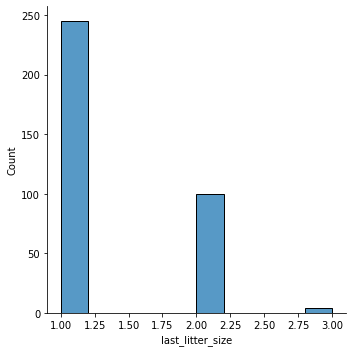

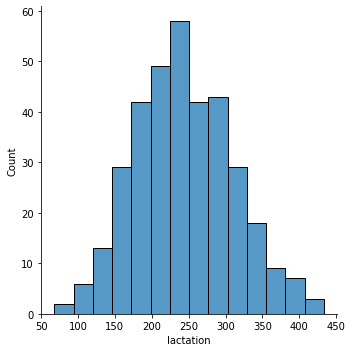

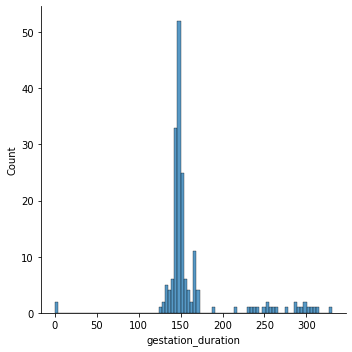

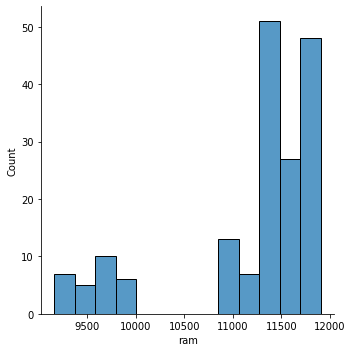

In [ ]:
sns.displot(data_train, x='last_litter_size')
sns.displot(data_train, x='lactation')
sns.displot(data_train, x='gestation_duration')
sns.displot(data_train, x='ram')

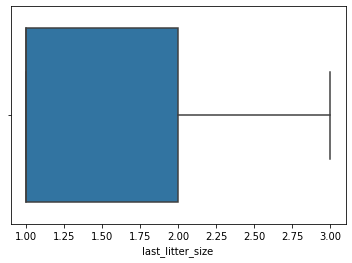

In [ ]:
sns.boxplot(x = data_train['last_litter_size'])

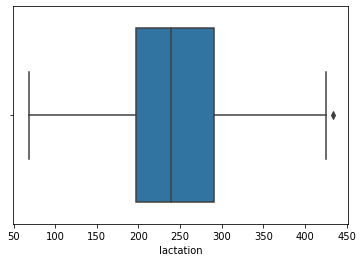

In [ ]:
sns.boxplot(x = data_train['lactation'])

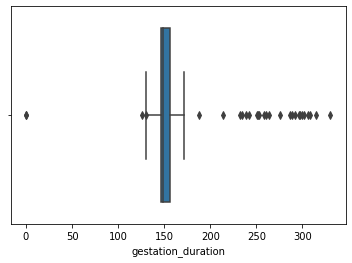

In [ ]:
sns.boxplot(x = data_train['gestation_duration'])

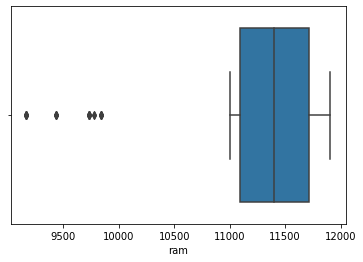

In [ ]:
sns.boxplot(x = data_train['ram'])

Au niveau de la fonction ***data_analysis*** :

- Nous modifions la forme de l'heure et regroupons la date la plus récente entre la date de l'insémination et la denrière date de portée et l'heure de l'insémination en une seule colonne ***last_date***.

- Nous rajoutons une colonne en booléen ***have_ai_date*** : **1** lorsque la date de l'insémination existe et **0** sinon.

Nous avons supprimé les colonnes suivantes vu que nous avons déjà extrait les informations derrière eux : ***ai_date***, ***ai_hour***, ***last_litter_date*** et ***ai_id***.

In [ ]:
def data_analysis (dataset) :
  H = []
  
  for hour in dataset['ai_hour'] : 
    if str(hour) == 'nan':
      H.append(datetime.timedelta(hours = 23, minutes = 59))
    else :
      t = datetime.datetime.strptime(hour,"%H:%M")
      H.append(datetime.timedelta(hours=t.hour, minutes=t.minute))

  dataset['ai_hour'] = H

  last_date = []
  have_ai_date = []

  for k in range(len(dataset['ai_date'])): 
    
    if str(dataset['ai_date'][k]) != 'NaT':
      last_date.append(dataset['ai_date'][k])
      have_ai_date.append(1)
    else : 
      last_date.append(dataset['last_litter_date'][k])
      have_ai_date.append(0)
      
  dataset['last_date'] = np.add(last_date, list(dataset['ai_hour']))
  dataset['have_ai_date'] = have_ai_date

In [ ]:
data_analysis(data_train)
data_train = data_train.drop(columns = ['ai_date','ai_hour', 'last_litter_date', 'ai_id'])
data_train

,ewe_id,last_litter_size,lactation,gestation_duration,ram,outcome,litter_ai_interval,ewe_age,last_date,have_ai_date
0,16064040114,1.0,236.5,144.187593,11306.0,0,3,3,2015-05-13 10:23:00,1
1,16064030151,1.0,230.7,150.868009,11293.0,1,3,2,2015-05-07 10:19:00,1
2,16064020085,1.0,311.7,168.190023,NaN,0,0,2,2014-10-04 23:59:00,0
3,16064040154,1.0,209.0,NaN,NaN,0,0,3,2014-12-19 23:59:00,0
4,16064010095,2.0,300.8,149.100116,11648.0,1,3,1,2016-05-02 10:25:00,1
...,...,...,...,...,...,...,...,...,...,...
345,16064010099,1.0,329.1,NaN,NaN,0,0,2,2014-12-19 23:59:00,0
346,16064001840,2.0,341.9,150.160197,11579.0,1,3,1,2016-05-04 10:50:00,1
347,16064001576,1.0,242.1,292.202326,11489.0,0,3,1,2015-05-05 10:40:00,1
348,16064040012,1.0,204.8,NaN,NaN,0,0,3,2014-12-09 23:59:00,0


Nous gérons les données manquantes des trois colonnes de cette manière :

- ***gestation_duration*** : Nous modifions les données abérrantes et manquantes par la moyenne des données de valeurs entre 130 et 170.
- ***last_litter_size*** : Nous remplaçons la seule valeur manquante par 1 vu que c'est la taille dominante.
- ***ram*** : Nous remplaçons les données manquantes par 0 vu que nous pensons que c'est significatif, car dans le cas que nous n'avons pas de bélier qui augmente les hormones chez le brebis alors l'insémination n'a pas été faite.

In [ ]:
def data_processing(df, min, max):
  df['gestation_duration'].fillna(0, inplace=True)
  gest = df['gestation_duration']
  element = [i for i in df['gestation_duration'] if min <= i <= max]
  gestation_duration_mean = sum(element) / len(element)
  df['gestation_duration'][df['gestation_duration'] < min] = gestation_duration_mean
  df['gestation_duration'][df['gestation_duration'] > max] = gestation_duration_mean
  df['last_litter_size'].values[np.isnan(df['last_litter_size'])] = 1 #1
  df['ram'].values[np.isnan(df['ram'])] = 0 #1
  df['last_litter_size'] = df['last_litter_size'].astype(float)
  df['gestation_duration'] = df['gestation_duration'].astype(float)
  df['ram'] = df['ram'].astype(float)
  return df

data_processing(data_train, 130, 170)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,ewe_id,last_litter_size,lactation,gestation_duration,ram,outcome,litter_ai_interval,ewe_age,last_date,have_ai_date
0,16064040114,1.0,236.5,144.187593,11306.0,0,3,3,2015-05-13 10:23:00,1
1,16064030151,1.0,230.7,150.868009,11293.0,1,3,2,2015-05-07 10:19:00,1
2,16064020085,1.0,311.7,168.190023,0.0,0,0,2,2014-10-04 23:59:00,0
3,16064040154,1.0,209.0,149.091091,0.0,0,0,3,2014-12-19 23:59:00,0
4,16064010095,2.0,300.8,149.100116,11648.0,1,3,1,2016-05-02 10:25:00,1
...,...,...,...,...,...,...,...,...,...,...
345,16064010099,1.0,329.1,149.091091,0.0,0,0,2,2014-12-19 23:59:00,0
346,16064001840,2.0,341.9,150.160197,11579.0,1,3,1,2016-05-04 10:50:00,1
347,16064001576,1.0,242.1,149.091091,11489.0,0,3,1,2015-05-05 10:40:00,1
348,16064040012,1.0,204.8,149.091091,0.0,0,0,3,2014-12-09 23:59:00,0


In [ ]:
print(data_train.isna().sum())

ewe_id                0
last_litter_size      0
lactation             0
gestation_duration    0
ram                   0
outcome               0
litter_ai_interval    0
ewe_age               0
last_date             0
have_ai_date          0
dtype: int64


Au niveau de la fonction ***intercourse_filter*** :

- Nous calculons la moyenne des durées de copulation pour chaque brebis dans la durée avant la date la plus récente entre la dernière date de portée et la date d'insémination. Nous rajoutons la colonne ***intercourse_duration*** dans le dataset d'apprentissage.
- Nous rajoutons l'identifiant du bélier alpha le plus dominant pour chaque brebis dans la durée avant la date la plus récente entre la dernière date de portée et la date d'insémination. Nous rajoutons la colonne ***alpha*** dans le dataset d'apprentissage.
- Nous calculons le nombre total des rapports sexuels pour chaque brebis dans la durée avant la date la plus récente entre la dernière date de portée et la date d'insémination. Nous rajoutons la colonne ***intercourse_nb*** dans le dataset d'apprentissage.

Nous avons supprimé après ***last_date*** vu que nous n'aurons plus besoin de cette information.

In [ ]:
def intercourse_filter(dataset):
  durations = []
  alphas = []
  intercourse_numbers = []
  for i in range(len(dataset['ewe_id'])): 
    id = dataset['ewe_id'][i]
    recent_date = dataset['last_date'][i]
    born_inf = recent_date - datetime.timedelta(hours = 36)
    df = data_intercourse.loc[(data_intercourse['ewe_id'] == id) & (data_intercourse['intercourse_date'] < recent_date) , :]
    if len(df['alpha'].value_counts()) !=0:
      durations.append(np.mean(df['intercourse_duration'].sum()))
      alphas.append(df['alpha'].value_counts().index[0])
      intercourse_numbers.append(len(df))
    else :
      durations.append(0)
      alphas.append(0)
      intercourse_numbers.append(0)
  dataset['intercourse_duration'] = durations
  dataset['alpha'] = alphas
  dataset ['intercourse_nb'] = intercourse_numbers

In [ ]:
intercourse_filter(data_train)
data_train = data_train.drop(columns = ['last_date'])
data_train

,ewe_id,last_litter_size,lactation,gestation_duration,ram,outcome,litter_ai_interval,ewe_age,have_ai_date,intercourse_duration,alpha,intercourse_nb
0,16064040114,1.0,236.5,144.187593,11306.0,0,3,3,1,30.4,16,18
1,16064030151,1.0,230.7,150.868009,11293.0,1,3,2,1,0.0,0,0
2,16064020085,1.0,311.7,168.190023,0.0,0,0,2,0,0.0,0,0
3,16064040154,1.0,209.0,149.091091,0.0,0,0,3,0,0.0,0,0
4,16064010095,2.0,300.8,149.100116,11648.0,1,3,1,1,79.8,1,32
...,...,...,...,...,...,...,...,...,...,...,...,...
345,16064010099,1.0,329.1,149.091091,0.0,0,0,2,0,0.0,0,0
346,16064001840,2.0,341.9,150.160197,11579.0,1,3,1,1,5.8,18,7
347,16064001576,1.0,242.1,149.091091,11489.0,0,3,1,1,70.8,18,34
348,16064040012,1.0,204.8,149.091091,0.0,0,0,3,0,0.0,0,0


Nous analysons la matrice de corrélation et puis supprimons les colonnes corrélées.

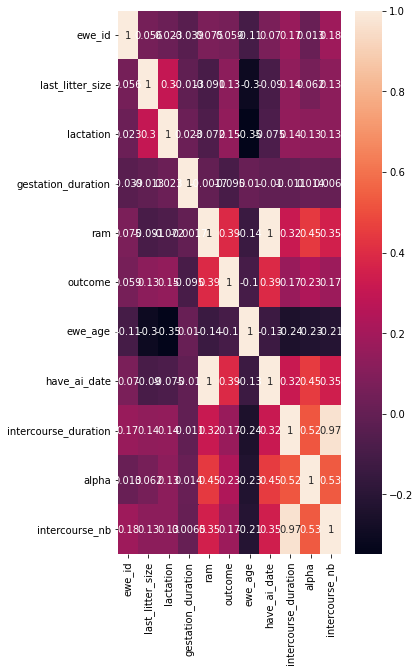

In [ ]:
corr = data_train.corr()
corr.style.background_gradient(cmap='coolwarm')
import seaborn as sn
fig, ax = plt.subplots(figsize=(5,10))
sn.heatmap(corr, annot=True, ax=ax)

In [ ]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)
# Drop features 
data_train.drop(to_drop, axis=1, inplace=True)
data_train

['have_ai_date', 'intercourse_nb']


,ewe_id,last_litter_size,lactation,gestation_duration,ram,outcome,litter_ai_interval,ewe_age,intercourse_duration,alpha
0,16064040114,1.0,236.5,144.187593,11306.0,0,3,3,30.4,16
1,16064030151,1.0,230.7,150.868009,11293.0,1,3,2,0.0,0
2,16064020085,1.0,311.7,168.190023,0.0,0,0,2,0.0,0
3,16064040154,1.0,209.0,149.091091,0.0,0,0,3,0.0,0
4,16064010095,2.0,300.8,149.100116,11648.0,1,3,1,79.8,1
...,...,...,...,...,...,...,...,...,...,...
345,16064010099,1.0,329.1,149.091091,0.0,0,0,2,0.0,0
346,16064001840,2.0,341.9,150.160197,11579.0,1,3,1,5.8,18
347,16064001576,1.0,242.1,149.091091,11489.0,0,3,1,70.8,18
348,16064040012,1.0,204.8,149.091091,0.0,0,0,3,0.0,0


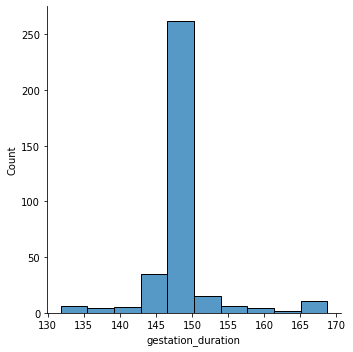

In [ ]:
sns.displot(data_train, x='gestation_duration')

In [ ]:
data_train['alpha'].value_counts()

0     185
15     22
13     18
14     17
18     16
16     16
11     15
3      14
19     11
1      10
2       9
12      8
4       8
17      1
Name: alpha, dtype: int64

### **Dataset de test**

Pour le dataset de test, nous allons appliquer les mêmes processus réalisés pour le dataset d'apprentissage.

In [ ]:
data_test = pd.read_csv("/content/test.csv", parse_dates=['last_litter_date', 'ai_date', 'birth_date'])
data_test

,ewe_id,birth_date,last_litter_date,last_litter_size,lactation,gestation_duration,ai_date,ai_hour,ram,ai_id
0,16064001356,2009-01-01,2014-10-18,1,269.0,NaN,NaT,NaN,NaN,351
1,16064001051,2009-01-01,2014-09-27,1,265.9,136.089282,2015-05-05,10:34,11489.0,352
2,16064010034,2011-01-01,2014-10-07,2,213.0,140.923287,2015-05-11,10:25,11290.0,353
3,16064020145,2012-01-01,2015-10-01,2,371.7,NaN,NaT,NaN,NaN,354
4,16064010059,2011-01-01,2014-09-28,1,275.7,169.725868,NaT,NaN,NaN,355
...,...,...,...,...,...,...,...,...,...,...
79,16064030113,2013-01-01,2014-10-04,1,359.3,145.928090,2015-05-11,10:29,11006.0,430
80,16064010124,2011-01-01,2015-10-26,1,271.2,147.748854,2016-05-09,10:17,11907.0,431
81,16064020061,2012-01-01,2014-10-06,2,283.0,NaN,NaT,NaN,NaN,432
82,16064040117,2014-01-01,2016-02-04,2,178.1,NaN,NaT,NaN,NaN,433


In [ ]:
print(data_test.shape)
print(data_test.isna().sum())
print(data_test.dtypes)
print(data_test.info())
print(data_test.describe())

(84, 10)
ewe_id                 0
birth_date             0
last_litter_date       0
last_litter_size       0
lactation              0
gestation_duration    49
ai_date               49
ai_hour               49
ram                   49
ai_id                  0
dtype: int64
ewe_id                         int64
birth_date            datetime64[ns]
last_litter_date      datetime64[ns]
last_litter_size               int64
lactation                    float64
gestation_duration           float64
ai_date               datetime64[ns]
ai_hour                       object
ram                          float64
ai_id                          int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ewe_id              84 non-null     int64         
 1   birth_date          84 non-null     datetime64[ns]
 2   last_litter_

In [ ]:
def litter_ai_interval_test(df):
  duree = df['ai_date'] - df['last_litter_date']
  nb_1 = 0
  nb_2 = 0
  nb_3 = 0
  for i in range(len(duree)):
    duree[i] = duree[i].days
    if duree[i] > 150 :
      duree[i] = 3
      nb_3 += 1
    elif duree[i] < 120:
      duree[i] = 1
      nb_1 += 1
    elif duree[i] > 120 and duree[i] < 150:
      duree[i] = 2
      nb_2 += 1
    else:
      duree[i] = 0
  df['litter_ai_interval'] = duree

In [ ]:
def ewe_age_test(df):
  duree = []
  for j in range(len(df['ai_date'])):
    if type(df['ai_date'][j]) == pd._libs.tslibs.nattype.NaTType :
      duree.append((datetime.datetime(year = 2015, month = 12, day = 30) - df['birth_date'][j]).days)
    else:  
      duree.append((df['ai_date'][j] - df['birth_date'][j]).days)
  nb_1 = 0
  nb_2 = 0
  nb_3 = 0
  for i in range(len(duree)):
    if duree[i] > 1825 :
      duree[i] = 1
      nb_1 += 1
    elif duree[i] < 750 and duree[i] < 1825:
      duree[i] = 3
      nb_3 += 1
    else:
      duree[i] = 2
      nb_2 += 1  
  df['ewe_age'] = duree

In [ ]:
litter_ai_interval_test(data_test)
ewe_age_test(data_test)
data_test = data_test.drop(columns = ['birth_date'])
data_test

,ewe_id,last_litter_date,last_litter_size,lactation,gestation_duration,ai_date,ai_hour,ram,ai_id,litter_ai_interval,ewe_age
0,16064001356,2014-10-18,1,269.0,NaN,NaT,NaN,NaN,351,0,1
1,16064001051,2014-09-27,1,265.9,136.089282,2015-05-05,10:34,11489.0,352,3,1
2,16064010034,2014-10-07,2,213.0,140.923287,2015-05-11,10:25,11290.0,353,3,2
3,16064020145,2015-10-01,2,371.7,NaN,NaT,NaN,NaN,354,0,2
4,16064010059,2014-09-28,1,275.7,169.725868,NaT,NaN,NaN,355,0,2
...,...,...,...,...,...,...,...,...,...,...,...
79,16064030113,2014-10-04,1,359.3,145.928090,2015-05-11,10:29,11006.0,430,3,2
80,16064010124,2015-10-26,1,271.2,147.748854,2016-05-09,10:17,11907.0,431,3,1
81,16064020061,2014-10-06,2,283.0,NaN,NaT,NaN,NaN,432,0,2
82,16064040117,2016-02-04,2,178.1,NaN,NaT,NaN,NaN,433,0,3


In [ ]:
ai_id = list(data_test['ai_id'])
data_analysis(data_test)
data_test = data_test.drop(columns = ['ai_date','ai_hour', 'last_litter_date', 'ai_id'])
data_processing(data_test, 135, 170)
data_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,ewe_id,last_litter_size,lactation,gestation_duration,ram,litter_ai_interval,ewe_age,last_date,have_ai_date
0,16064001356,1.0,269.0,148.243266,0.0,0,1,2014-10-18 23:59:00,0
1,16064001051,1.0,265.9,136.089282,11489.0,3,1,2015-05-05 10:34:00,1
2,16064010034,2.0,213.0,140.923287,11290.0,3,2,2015-05-11 10:25:00,1
3,16064020145,2.0,371.7,148.243266,0.0,0,2,2015-10-01 23:59:00,0
4,16064010059,1.0,275.7,169.725868,0.0,0,2,2014-09-28 23:59:00,0
...,...,...,...,...,...,...,...,...,...
79,16064030113,1.0,359.3,145.928090,11006.0,3,2,2015-05-11 10:29:00,1
80,16064010124,1.0,271.2,147.748854,11907.0,3,1,2016-05-09 10:17:00,1
81,16064020061,2.0,283.0,148.243266,0.0,0,2,2014-10-06 23:59:00,0
82,16064040117,2.0,178.1,148.243266,0.0,0,3,2016-02-04 23:59:00,0


In [ ]:
intercourse_filter(data_test)
data_test = data_test.drop(columns = ['last_date'])
data_test

,ewe_id,last_litter_size,lactation,gestation_duration,ram,litter_ai_interval,ewe_age,have_ai_date,intercourse_duration,alpha,intercourse_nb
0,16064001356,1.0,269.0,148.243266,0.0,0,1,0,0.0,0,0
1,16064001051,1.0,265.9,136.089282,11489.0,3,1,1,0.0,0,0
2,16064010034,2.0,213.0,140.923287,11290.0,3,2,1,3.3,19,2
3,16064020145,2.0,371.7,148.243266,0.0,0,2,0,0.0,0,0
4,16064010059,1.0,275.7,169.725868,0.0,0,2,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
79,16064030113,1.0,359.3,145.928090,11006.0,3,2,1,80.3,18,34
80,16064010124,1.0,271.2,147.748854,11907.0,3,1,1,106.2,11,40
81,16064020061,2.0,283.0,148.243266,0.0,0,2,0,0.0,0,0
82,16064040117,2.0,178.1,148.243266,0.0,0,3,0,0.0,0,0


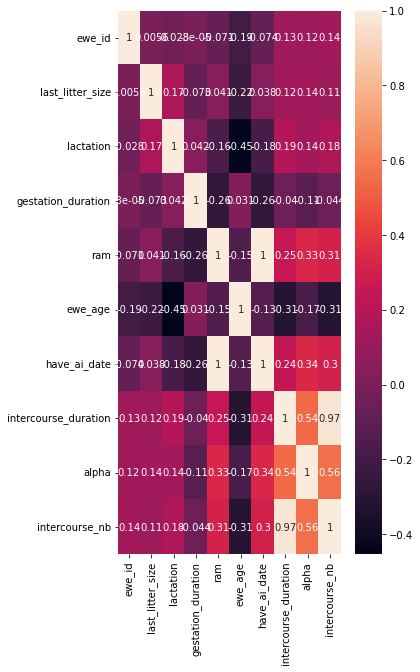

In [ ]:
corr = data_test.corr()
corr.style.background_gradient(cmap='coolwarm')
import seaborn as sn
fig, ax = plt.subplots(figsize=(5,10))
sn.heatmap(corr, annot=True, ax=ax)

In [ ]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
data_test.drop(to_drop, axis=1, inplace=True)
data_test

,ewe_id,last_litter_size,lactation,gestation_duration,ram,litter_ai_interval,ewe_age,intercourse_duration,alpha
0,16064001356,1.0,269.0,148.243266,0.0,0,1,0.0,0
1,16064001051,1.0,265.9,136.089282,11489.0,3,1,0.0,0
2,16064010034,2.0,213.0,140.923287,11290.0,3,2,3.3,19
3,16064020145,2.0,371.7,148.243266,0.0,0,2,0.0,0
4,16064010059,1.0,275.7,169.725868,0.0,0,2,0.0,0
...,...,...,...,...,...,...,...,...,...
79,16064030113,1.0,359.3,145.928090,11006.0,3,2,80.3,18
80,16064010124,1.0,271.2,147.748854,11907.0,3,1,106.2,11
81,16064020061,2.0,283.0,148.243266,0.0,0,2,0.0,0
82,16064040117,2.0,178.1,148.243266,0.0,0,3,0.0,0


## **Construction des modèles de prédiction**

Dans cette partie, nous allons effectuer les dernières préparations de données et puis entrainer différents modèles pour optimiser le score d'**accuracy**. .

### **Préparation de données**

Nous commencons pas normaliser la totalité des données après la construction des données d'apprentissage et de test.

In [ ]:
features_columns = data_train.columns
features_columns = features_columns.drop('outcome')
X_train = data_train[features_columns].to_numpy()
target_column = 'outcome'
Y_train = data_train[target_column].to_numpy()

features_columns = data_test.columns
X_test = data_test[features_columns].to_numpy()

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

### **Hyperparamètres optimaux des modèles**

Nous avons fait le choix d'utiliser 5 classifieurs : ***KNN***, ***RandomForest***, ***LDA***, ***SVM*** et ***XGB***.

Nous cherchons les hyperparamètres optimaux pour chaque classfieur.

**KNN**

In [ ]:
pipe = Pipeline([ 
        ('knn', KNeighborsClassifier(algorithm='brute')) 
    ])
params = {
        'knn__n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] # usually odd numbers
    }
knn = GridSearchCV(estimator=pipe,           
                      param_grid=params, 
                      cv=30,
                      return_train_score=True) # Turn on cv train scores
knn.fit(X_train, Y_train)


GridSearchCV(cv=30,
             estimator=Pipeline(steps=[('knn',
                                        KNeighborsClassifier(algorithm='brute'))]),
             param_grid={'knn__n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                              13]},
             return_train_score=True)

In [ ]:
print(knn.best_params_)
print(knn.best_score_)

{'knn__n_neighbors': 10}
0.701262626262626


**LDA**

In [ ]:
model = LinearDiscriminantAnalysis()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
lda = search.fit(X_train, Y_train)

In [ ]:
print(lda.best_score_)
print(lda.best_params_)

0.7000000000000003
{'solver': 'svd'}


In [ ]:
model = LinearDiscriminantAnalysis(solver='lsqr')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['shrinkage'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
lda = search.fit(X_train, Y_train)

In [ ]:
print('Mean Accuracy: %.3f' % lda.best_score_)
print('Config: %s' % lda.best_params_)

Mean Accuracy: 0.703
Config: {'shrinkage': 0.02}


**RandomForest**

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
print(rf_random.best_params_)
print(rf_random.best_score_)

{'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 110, 'bootstrap': True}
0.7142646625405247


**XGBOOST**


In [ ]:
bayes_cv_tuner = BayesSearchCV(
    estimator = xgb.XGBClassifier(
    ),
    search_spaces = {
        'learning_rate': (0.01, 0.9, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 50),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'min_child_weight': (0, 5),
        'n_estimators': (50, 100),
    },    
    scoring = 'accuracy',
    cv = 4
)
bayes_cv_tuner.fit(X_train, Y_train)

BayesSearchCV(cv=4, estimator=XGBClassifier(), scoring='accuracy',
              search_spaces={'colsample_bylevel': (0.01, 1.0, 'uniform'),
                             'colsample_bytree': (0.01, 1.0, 'uniform'),
                             'learning_rate': (0.01, 0.9, 'log-uniform'),
                             'max_delta_step': (0, 20), 'max_depth': (0, 50),
                             'min_child_weight': (0, 5),
                             'n_estimators': (50, 100),
                             'subsample': (0.01, 1.0, 'uniform')})

In [ ]:
xgb_best = bayes_cv_tuner.best_estimator_
print(xgb_best.get_xgb_params)

<bound method XGBModel.get_xgb_params of XGBClassifier(colsample_bylevel=1.0, colsample_bytree=0.5457624140196121,
              learning_rate=0.012938220526687791, max_delta_step=13,
              max_depth=42, min_child_weight=2, n_estimators=98,
              subsample=0.24886408878300853)>


**SVM**

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.614 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.629 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.614 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.771 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.657 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.543 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.7171428571428572
SVC(C=1, gamma=0.1)


### **Ensemble Learning**

Nous essayons de combiner les modèles avec les scores les plus élevés en utilisant le hard voting et le stacking.

In [ ]:
model_rf = RandomForestClassifier(n_estimators = 600, min_samples_split = 10, min_samples_leaf = 2, max_features = 'log2', max_depth = 110, bootstrap = True)
model_lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0)
model_svm = SVC(C=1, gamma=0.1, kernel = 'rbf')
model_xgb = xgb.XGBClassifier(colsample_bylevel=1.0, colsample_bytree=0.5457624140196121,
              learning_rate=0.012938220526687791, max_delta_step=13,
              max_depth=42, min_child_weight=2, n_estimators=98,
              subsample=0.24886408878300853)
lr=LogisticRegression(n_jobs=1)
#models_ = [('svm',model_svm),('rf',model_rf), ('lda', model_lda), ('xgb', model_xgb)]
models_ = [('svm',model_svm), ('lda', model_lda)]

### **Comparaison des classfieurs**

Nous comparons tous les classifieurs avec les hyperparamètres optimaux calculés en plus de quelques autres classifieurs.

LR: 0.694286 (0.074560)
LDA: 0.694286 (0.072337)
KNN: 0.697143 (0.042762)
CART: 0.680000 (0.045714)
RF: 0.700000 (0.079025)
NB: 0.674286 (0.064143)
SVM: 0.722857 (0.055769)
XGB: 0.714286 (0.059932)
HD: 0.708571 (0.063632)
STACK: 0.717143 (0.057782)


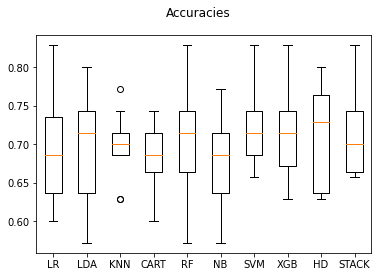

In [ ]:
# Compare classfiers
# prepare configuration for cross validation test harness
seed = 7
X = X_train
Y = Y_train
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 10)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators = 600, min_samples_split = 10, min_samples_leaf = 2, max_features = 'log2', max_depth = 110, bootstrap = True)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=1, gamma=0.1, kernel = 'rbf')))
models.append(('XGB',xgb.XGBClassifier(colsample_bylevel=1.0, colsample_bytree=0.5457624140196121,
              learning_rate=0.012938220526687791, max_delta_step=13,
              max_depth=42, min_child_weight=2, n_estimators=98,
              subsample=0.24886408878300853)))
models.append(('HD', VotingClassifier(estimators=models_, voting='hard')))
models.append(('STACK', StackingClassifier(estimators=models_, final_estimator=lr)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Accuracies')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### **Prédiction**

Nous appliquons les modèles sur le dataset de test et créons le fichier csv contenant les deux colonnes ***ai_id*** et ***outcome***.

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors = 10)
model_rf = RandomForestClassifier(n_estimators = 600, min_samples_split = 10, min_samples_leaf = 2, max_features = 'log2', max_depth = 110, bootstrap = True)
model_xgb = xgb.XGBClassifier(colsample_bylevel=1.0, colsample_bytree=0.5457624140196121,
              learning_rate=0.012938220526687791, max_delta_step=13,
              max_depth=42, min_child_weight=2, n_estimators=98,
              subsample=0.24886408878300853)
model_lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0)
model_svm = SVC(C=1, gamma=0.1, kernel = 'rbf')
model_hard = VotingClassifier(estimators=models_, voting='hard')
model_stacking = StackingClassifier(estimators=models_, final_estimator=lr)
model_knn.fit(X_train, Y_train)
model_rf.fit(X_train, Y_train)
model_xgb.fit(X_train, Y_train)
model_lda.fit(X_train, Y_train)
model_svm.fit(X_train, Y_train)
model_hard.fit(X_train, Y_train)
model_stacking.fit(X_train, Y_train)
Y_pred_test_knn = model_knn.predict(X_test)
Y_pred_test_rf = model_rf.predict(X_test)
Y_pred_test_xgb = model_xgb.predict(X_test)
Y_pred_test_lda = model_lda.predict(X_test)
Y_pred_test_svm = model_svm.predict(X_test)
Y_pred_test_hard = model_hard.predict(X_test)
Y_pred_test_stacking = model_stacking.predict(X_test)

In [ ]:
df = pd.DataFrame(data={"ai_id" : ai_id, "outcome": Y_pred_test_stacking})
print(df)
df.to_csv("/content/sample_submission.csv", sep=';',index=False)

    ai_id  outcome
0     351        0
1     352        1
2     353        1
3     354        1
4     355        0
..    ...      ...
79    430        1
80    431        1
81    432        0
82    433        0
83    434        0

[84 rows x 2 columns]


In [ ]:
file = open("/content/sample_submission.csv", "r")
file_cor = open("/content/sample_submission_cor.csv", "w")
for line in file:
    file_cor.write(line.replace(";", ","))
    
file.close()
file_cor.close()